# Automated text classification for ICD 9 diagnosis code assignment from MIMIC Database

## Context

### Electronic Medical Records and coding
Health information systems are used at a large scale in the healthcare institutions and hospitals for various tasks, such as medical record management, medical prescription, and billing. As a result, increasing large volumes of healthcare data are regularly generated in the form of Electronic Medical Records (EMR). In this regard, textual data has a prominent place. Free text is actually a suitable form to describe a wide range of data related to patient’s care including medical history, personal statistics, admission diagnosis, patient-caregiver exchange, etc. However, despite of being an abundant and valuable resource, only low quantities of these data are actually used for specific mining tasks, e.g., [Perotte 2014, Pestian 2007]. One major issue that can be approached by capitalizing on the routinely generated textual data is the automation of diagnosis code assignment to medical notes [Chin 2017, Dermouche 2016, Ruch 2008]. The task involves characterizing patient’s hospitalstay (symptoms, diagnoses, treatments, etc.) by a small number of codes, usually derived from the International Classification of Diseases (ICD). Diagnosis codes provide a fast and easy understanding of patient’s state evolution. The same codes are used as billing elements by the health insurance systems. Because of its importance, the task of code assignment is often performed manually by professional coders. However, manual coding is tedious and time-consuming: on average the coders spend about five minutes identifying only single code.

### Automated ICD9 coding
Automated ICD9 coding, a multi-label classification task, has been investigated in the informatics community. In fact, the task of ICD9 coding for radiology reports was one of the first informatics community challenges [Pestian 2007]. Since then, several approches have been experimented : simple keyword mappings [Arkey 1995,Tchechmedjiev 2017], K-nearest neighbor, naive Bayes, Bayesian ridge regression [Ribeiro-Neto 2001, Pakhomov 2006, Lita 2008], support vector machines (SVMs)[Perotte 2014, Dermouche 2016] and more recenttly topic modeling [Dermouche 2016] or neural network [Ayyar 2016, Baumlel 2017, Chin 2017, Vani 2017] with promising results. Comparison of these methods is difficult, however, because they all leverage different datasets and/or methods.

### The challenge

To ensure reproducibility of training and test methods, working on a publicly available dataset offers a major opportunities to enable researchers interested in designing novel algorithms for clinical data processing to compare their results on the same data with the same metrics, and thus advance the state of the art [Perotte 2014]. Sevral databases have been used for this task among which death certificates in European languages as part of Clef eHealth challenge [[Clef eHealth](https://sites.google.com/site/clefehealth2017/)]. MIMIC-III (Medical Information Mart for Intensive Care III) is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. Comprehensive MIMIC database that spans more than a decade with detailed information about individual patient care, is suited to meet this challenge, and have been use for development and evaluation of automatic ICD code assignment pipelines [Ayyar 2016, Baumlel 2017, Dermouche 2016, Perotte 2014].

The objective of the challenge is the improvement of a baseline data processing pipeline for ICD 9 diagnosis code assignment from MIMIC Database.

### Data preparation from MIMIC database

#### Notes
The MIMIC notes table contains all de-identify texts for patients and contain many type of reports (ECG, radio, nurse…). Among those only the discharge summary have been extracted.

#### ICD codes
To guaranty representation of the codes, prediction task will concern ICD categories (level just upon the codes in the hierarchy) and only ICD catagories that has least 1000 occurrences have been selected 

#### Training and test set
Amoung the ... hospitalisation with both a discharge summary and ICD codes avaliable, .... have been selected regarding code frequencie. Data were split into a .... annoted discharge summary and .... test. 


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

### Data description

Load MIMIC tables NOTEEVENTS and DIAGNOSES_ICD

In [7]:
train_filename = 'data/train.csv'
data = pd.read_csv(train_filename)
data.head()


(41453, 3)

In [9]:
 # Re expand icd9 --> make one code by line
data['TARGET']=data['TARGET'].apply(lambda x : eval(x))
rows = []
_ = data.apply(lambda row: [rows.append([row['HADM_ID'],row['TEXT'],nn]) 
                         for nn in row.TARGET], axis=1)
data = pd.DataFrame(rows, columns=data.columns)
data.head()

,HADM_ID,TEXT,TARGET
0,104040.0,{Admission Date: [**2128-12-30**] ...,415
1,104040.0,{Admission Date: [**2128-12-30**] ...,276
2,104040.0,{Admission Date: [**2128-12-30**] ...,285
3,104040.0,{Admission Date: [**2128-12-30**] ...,584
4,104040.0,{Admission Date: [**2128-12-30**] ...,458


In [10]:
data.shape

(337483, 3)

In [14]:
data.TARGET.unique()

array(['415', '276', '285', '584', '458', '401', '530', '493', '197',
       '572', '456', '599', '427', '041', '426', '272', '733', '553',
       '294', '031', '564', '724', '038', '048', '425', '428', '453',
       '287', '275', '507', '518', '286', '511', '250', '491', '416',
       '403', '585', '414', '780', '291', '305', '263', '424', '410',
       '790', '043', '348', '070', '331', '482', '008', '707', '112',
       '300', '280', '274', '278', '284', '571', '789', '560', '567',
       '600', '788', '569', '784', '787', '786', '303', '779', '770',
       '774', '049', '785', '438', '715', '244', '345', '441', '578',
       '440', '076', '765', '682', '413', '562', '338', '293', '362',
       '162', '296', '411', '357', '198', '535', '433', '593', '576',
       '577', '574', '434', '443', '288', '057', '729', '519', '799', '327'], dtype=object)

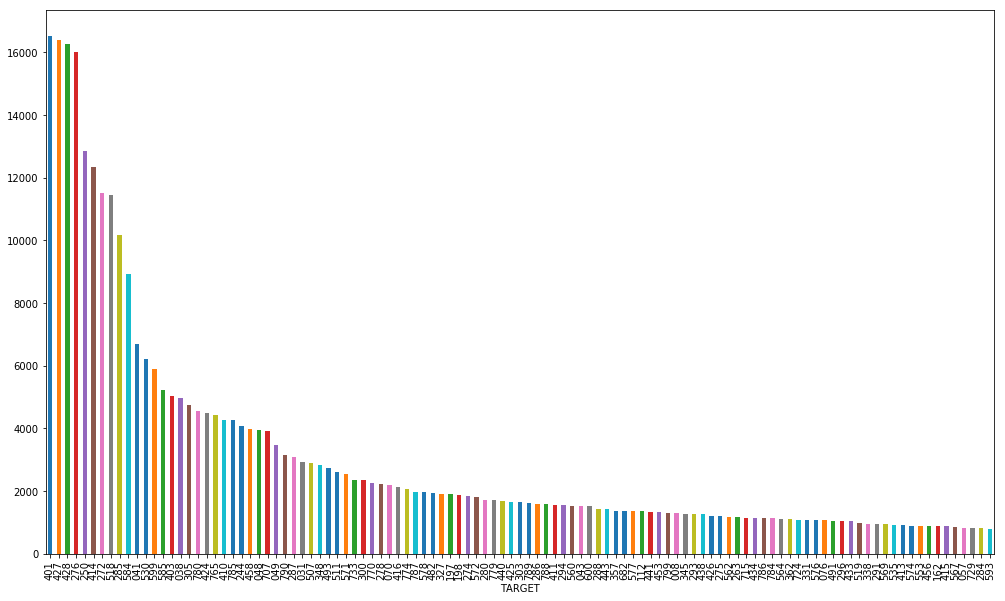

In [16]:
d_freq=data.groupby('TARGET')['HADM_ID'].count().sort_values(ascending=False)
d_freq.plot(kind='bar',figsize= (17, 10))

## starting kit python files

### problem.py

In [ ]:
%%file problem.py
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import rampwf as rw
from datetime import timedelta
from sklearn import model_selection

problem_title = 'Medical text classification in ICD 9 thesaurus'
_target_column_name = 'TARGET'

_prediction_label_names = [ '403', '048', '585', '425', '276', '724', '458', '287', '285',
       '275', '327', '338', '789', '790', '410', '414', '331', '530',
       '411', '482', '272', '305', '197', '424', '584', '682', '511',
       '599', '428', '401', '041', '571', '070', '250', '057', '572',
       '286', '518', '038', '280', '263', '303', '244', '112', '441',
       '049', '440', '274', '427', '569', '560', '491', '433', '043',
       '493', '416', '765', '076', '779', '774', '770', '362', '198',
       '780', '357', '293', '443', '031', '600', '294', '284', '553',
       '426', '707', '348', '787', '564', '300', '788', '453', '413',
       '507', '162', '785', '799', '574', '296', '733', '578', '438',
       '008', '593', '345', '519', '278', '715', '415', '535', '576',
       '288', '567', '786', '784', '729', '434', '456', '577', '562', '291']
# A type (class) which will be used to create wrapper objects for y_pred
Predictions = rw.prediction_types.make_multiclass(
    label_names=_prediction_label_names)

# An object implementing the workflow
workflow = rw.workflows.FeatureExtractorClassifier()

soft_score_matrix = np.array(np.diag(np.ones(len(_prediction_label_names))))

true_false_score_matrix = np.array(np.diag(np.ones(len(_prediction_label_names))))


score_types = [
    rw.score_types.SoftAccuracy(
        name='sacc', score_matrix=soft_score_matrix, precision=3),
    rw.score_types.Accuracy(name='acc', precision=3),
    rw.score_types.SoftAccuracy(
        name='tfacc', score_matrix=true_false_score_matrix, precision=3),
]


def get_cv(X, y):
    """Slice folds by equal date intervals."""
    n_splits = 8
    for i in range(n_splits):
        train_is, test_is = model_selection.train_test_split(np.arange(len(y)))
        yield train_is, test_is

def _read_data(path, f_name):
    data = pd.read_csv(os.path.join(path, 'data', f_name), sep=',',
                          dtype={'HADM_ID':np.int32, 'TEXT':str, 'TARGET':str})
    # Re expand icd9 --> make one code by line
    data['TARGET']=data['TARGET'].apply(lambda x : eval(x))
    rows = []
    _ = data.apply(lambda row: [rows.append([row['HADM_ID'],row['TEXT'],nn]) 
                         for nn in row.TARGET], axis=1)
    data = pd.DataFrame(rows, columns=data.columns)
    y_array = data[_target_column_name].values
    X_df = data.drop(_target_column_name, axis=1)
    test = os.getenv('RAMP_TEST_MODE', 0)
    if test:
        return X_df[:100], y_array[:100]
    else:
        return X_df, y_array


def get_train_data(path='.'):
    f_name = 'train.csv'
    return _read_data(path, f_name)


def get_test_data(path='.'):
    f_name = 'test.csv'
    return _read_data(path, f_name)

In [ ]:
%run problem.py

In [ ]:
%%file submissions/starting_kit/feature_extractor.py
from __future__ import unicode_literals
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from keras.preprocessing.text import Tokenizer
import unicodedata
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords

stpwrds = set([stopword for stopword in stopwords.words('english')])
stpwrds.update({'admission', 'birth', 'date', 'discharge', 'service','sex'})
punct = set(string.punctuation.replace('-', ''))
punct.update(["``", "`", "..."])

def clean_text_simple(text, my_stopwords=stpwrds, punct=punct, remove_stopwords=True, stemming=False):
    text = text.lower()
    text = ''.join(l for l in text if l not in punct) # remove punctuation (preserving intra-word dashes)
    text = re.sub(' +',' ',text) # strip extra white space
    text = text.strip() # strip leading and trailing white space 
    tokens = text.split() # tokenize (split based on whitespace)
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if len(w) > 2]

    if remove_stopwords:
        # remove stopwords from 'tokens'
        tokens = [x for x in tokens if x not in my_stopwords]

    if stemming:
        # apply stemmer
        stemmer = SnowballStemmer('english')
        tokens = [stemmer.stem(t) for t in tokens]

    return tokens



def document_preprocessor(doc):
    # TODO: is there a way to avoid these encode/decode calls?
    try:
        doc = unicode(doc, 'utf-8')
    except NameError:  # unicode is a default on python 3
        pass
    doc = unicodedata.normalize('NFD', doc)
    doc = doc.encode('ascii', 'ignore')
    doc = doc.decode("utf-8")
    return str(doc)


from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

def token_processor(tokens):
    for token in tokens:
        #remove special chars
        token=''.join(e for e in token if e.isalnum())
        yield stemmer.stem(token)

class FeatureExtractor(TfidfVectorizer):
    """Convert a collection of raw docs to a matrix of TF-IDF features. """

    def __init__(self):
        self.min_occur = 1
        self.max_length = -1
        self.vocab_size = -1
        self.tokenizer = Tokenizer() # create the tokenizer
         
        super(FeatureExtractor, self).__init__(
                analyzer='word',stop_words ='english', preprocessor=document_preprocessor)

    def fit(self, X_df, y=None):
        """Learn a vocabulary dictionary of all tokens in the raw documents.

        Parameters
        ----------
        X_df : pandas.DataFrame
            a DataFrame, where the text data is stored in the ``TEXT``
            column.
        """
        
        super(FeatureExtractor, self).fit(X_df.TEXT)
        
        
        return self

    def fit_transform(self, X_df, y=None):
        self.fit(X_df)
        return self.transform(self.X_df)

    def transform(self, X_df):

        statements = pd.Series(X_df.TEXT).apply(clean_text_simple)

        vocab = Counter()
        for statement in statements:
            vocab.update(statement)
        tokens = [k for k,c in vocab.items() if c >= self.min_occur]
        statements = statements.apply(lambda x: [w for w in x if w in tokens])
        statements = statements.apply(lambda x: ' '.join(x))
        statements = list(statements.values)
        vec_c = TfidfVectorizer(ngram_range=(1, 1))
        tf_idf = vec_c.fit_transform(statements)
        return tf_idf

    def build_tokenizer(self):
        """
        Internal function, needed to plug-in the token processor, cf.
        http://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes
        """
        tokenize = super(FeatureExtractor, self).build_tokenizer()
        return lambda doc: list(token_processor(tokenize(doc)))



In [107]:
%run submissions/starting_kit/feature_extractor.py

In [108]:
%%file submissions/starting_kit/classifier.py

from __future__ import unicode_literals
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import pandas as pd
import numpy as np



class Classifier():
    def __init__(self):
        #self.raw_embedding = load_embedding_from_url(url='http://nlp.stanford.edu/data/glove.6B.zip', filename='glove.6B.200d.txt')
        self.clf = RandomForestClassifier()
        # self.metaclf = XGBClassifier()

    def fit(self, X, y):

        self.clf.fit(X, y)

    def predict(self, X):
        y_proba = self.predict_proba(X)
        y = np.argmax(y_proba, axis=1)
        return y

    def predict_proba(self, X):
        y_proba = self.clf.predict_proba(X)
        
        return  y_proba

Overwriting submissions/starting_kit/classifier.py


In [109]:
%run submissions/starting_kit/classifier.py

In [ ]:
X,y =get_train_data()

In [ ]:
fe=FeatureExtractor()
fe.fit(X.iloc[0:10000,])
X_fe = fe.transform(X.iloc[0:10000,])

In [ ]:
cl=Classifier()
cl.fit(X_fe,y[0:10000])  

In [117]:
X,y =get_test_data()
X_fe = fe.transform(X.iloc[0:10000,])
y_predict,y_proba = cl.predict(X_fe),cl.predict_proba(X_fe)

In [118]:
mat = confusion_matrix(y[0:10000],y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('true label')
plt.ylabel('predicted label');

array(['410', '410', '410', '410', '410', '410', '410', '567', '567', '567'], dtype=object)

In [ ]:
!ramp_test_submission --quick-test

### Bibliography









- [Arkey 1995] Arkey L, Croft B. Automatic assignment of ICD9 codes to discharge summaries. University of Massachusetts, 1995.

- [Baumel 2017] Baumel, T., Nassour-Kassis, J., Cohen, R., Elhadad, M., \& Elhadad, N.\ 2017, arXiv:1709.09587 

- [Chin 2017] Chin 2017 Chin L, Chia-Jung H, Yu-Sheng L, Shih-Jen Y, Chia-Cheng L, Sui-Lung S, Hsiang-Cheng C. Artificial Intelligence Learning Semantics via External Resources for Classifying Diagnosis Codes in DischargeNotes.

- [Dermouche 2016] Dermouche 2016 Dermouche, M., Velcin,J. ,Flicoteaux, R. , Chevret S. and Taright N. Supervised Topic Models for Diagnosis Code Assignment to Discharge Summaries. Proceedings of the 17th International Conference on Intelligent Text Processing and Computational Linguistics (CICLING), Konya, Turkey, 2016.

- [Farkas 2008] Richard Farkas and Gyorgy Szarvas. Automatic construction of rule-based ICD-9-CM coding systems. BMC bioinformatics, 9 Suppl 3:S10, 2008.

- [Goldstein 2007] Ira Goldstein, Anna Arzrumtsyan, and Ozlem Uzuner. Three approaches to automatic assignment of ICD-9-CM codes to radiology reports. In Proceedings of AMIA Symposium (AMIA’07), pages 279–83, 2007.

- [Lita 2008] Lita L, Yu S, Niculescu S, et al. Large scale diagnostic code classification for medical patient records. In: Proceedings of the 3rd International Joint Conference on Natural Language Processing (IJCNLP’08). 2008

- [Medori 2010] Julia Medori and C´edrick Fairon. Machine learning and features selection for semiautomatic ICD-9-CM encoding. In Proceedings of the NAACL HLT 2010 Second Louhi Workshop on Text and Data Mining of Health Documents (Louhi’10), pages 84–89, Los Angeles, CA, USA, 2010. ACL.

- [Pakhomov 2006] Pakhomov SVS , Buntrock JD, Chute CG, et al. Automating the assignment of diagnosis codes to patient encounters using example-based and machine learning techniques. J Am Med Informatics Assoc JAMIA 2006;13:516

- [Perotte 2014] Adler Perotte, Rimma Pivovarov, Karthik Natarajan, Nicole Weiskopf, Frank Wood, and Noémie Elhadad. Diagnosis code assignment: models and evaluation metrics. Journal of the American Medical Informatics Association (JAMIA), 21(2):231–237, 2014.

- [Pestian 2007] John P. Pestian, Christopher Brew, Pawel Matykiewicz, D. J. Hovermale, Neil Johnson, K. Bretonnel Cohen, and Wlodzislaw Duch. A Shared Task Involving Multi-label Classification of Clinical Free Text. In Proceedings of the Workshop on BioNLP 2007: Biological, Translational, and Clinical Language Processing (BioNLP’07), pages 97–104, Prague, Czech Republic, 2007. ACL.

- [Ribeiro-Neto 2001] Ribeiro-Neto B, Laender AHF, de Lima LRS. An experimental study in automatically categorizing medical documents. J Am Soc Inf Sci Technol 2001;52:391

- [Ruch 2008] Patrick Ruch, Julien Gobeilla, Imad Tbahritia, and Antoine Geissbuhlera. From episodes of care to diagnosis codes: automatic text categorization for medicoeconomic encoding. In Proccedings of the AMIA Symposium (AMIA’08), pages 636–40, Washington D.C., USA, 2008.

- [Tchechmedjiev 2017] Andon Tchechmedjiev, Amine Abdaoui, Vincent Emonet, Clement Jonquet. ICD-10 coding of death certificates with the NCBO and SIFR Annotators at CLEF eHealth 2017. Working Notes of CLEF eHealth Evaluation Lab, Sep 2017, Dublin, Ireland. CEUR, CEUR Workshop Proceedings, 1866.

- [Vani 2017] Ankit Vani, Yacine Jernitey and David Sontagz. Recurrent Neural Networks,  stat.ML 23 May 2017 arXiv:1705.08557v1

- [Zhang 2008] Yitao Zhang. A hierarchical approach to encoding medical concepts for clinical notes. In Proceedings of the 46th Annual Meeting of the Association for Computational Linguistics on Human Language Technologies: Student Research Workshop (HLT-SRWS’08), pages 67–72, Columbus, OH, USA, 2008. ACL.

